In [3]:
import pycaret
pycaret.__version__

'3.3.2'

In [14]:
# csv path
csv_path = r"D:\DSpit\AIH\lab\Diabetic-Patients-Readmission-Prediction\CSV Files\Diabetes_cleaned.csv"

In [15]:
import pandas as pd

In [16]:
from pycaret.datasets import get_data
# data = get_data('insurance')
data = pd.read_csv(csv_path)

In [17]:
data.head()

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,...,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,diabetesMed,readmitted,preceding_year_visits,number_changes,insulin_treatment
0,Caucasian,0,5,Not Available,Referral,1,41,0,1,Diabetes,...,-2,-2,-2,-2,-2,0,0,0,0.0,no_med
1,Caucasian,0,15,Discharged to home,Emergency,3,59,0,18,"Endocrine, Nutritional, Metabolic, Immunity",...,-2,-2,-2,-2,1,1,0,0,1.0,insulin_only
2,AfricanAmerican,0,25,Discharged to home,Emergency,2,11,5,13,"Pregnancy, Childbirth",...,0,-2,-2,-2,-2,1,0,3,0.0,other_meds
3,Caucasian,1,35,Discharged to home,Emergency,2,44,1,16,Infectious and Parasitic,...,-2,-2,-2,-2,1,1,0,0,1.0,insulin_only
4,Caucasian,1,45,Discharged to home,Emergency,1,51,0,8,Neoplasms,...,0,-2,-2,-2,0,1,0,0,0.0,insulin_combo


In [18]:
from pycaret.regression import *
s = setup(data, target = 'time_in_hospital', session_id = 123)

,Description,Value
0,Session id,123
1,Target,time_in_hospital
2,Target type,Regression
3,Original data shape,"(97070, 28)"
4,Transformed data shape,"(97070, 103)"
5,Transformed train set shape,"(67949, 103)"
6,Transformed test set shape,"(29121, 103)"
7,Numeric features,18
8,Categorical features,9
9,Rows with missing values,99.7%


In [19]:
from pycaret.regression import RegressionExperiment
exp = RegressionExperiment()

In [20]:
exp.setup(data, target = 'time_in_hospital', session_id = 123)

,Description,Value
0,Session id,123
1,Target,time_in_hospital
2,Target type,Regression
3,Original data shape,"(97070, 28)"
4,Transformed data shape,"(97070, 103)"
5,Transformed train set shape,"(67949, 103)"
6,Transformed test set shape,"(29121, 103)"
7,Numeric features,18
8,Categorical features,9
9,Rows with missing values,99.7%


In [21]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.7029,5.1699,2.2736,0.4123,0.4143,0.5754,26.1470
rf,Random Forest Regressor,1.7054,5.1736,2.2744,0.4119,0.4144,0.5780,17.8340
gbr,Gradient Boosting Regressor,1.7221,5.2059,2.2815,0.4082,0.4188,0.5991,2.8230
lr,Linear Regression,1.7694,5.4565,2.3358,0.3797,0.4328,0.6104,1.3560
ridge,Ridge Regression,1.7694,5.4565,2.3358,0.3797,0.4328,0.6104,0.5390
br,Bayesian Ridge,1.7695,5.4564,2.3358,0.3797,0.4327,0.6105,0.8310
huber,Huber Regressor,1.7672,5.7891,2.4058,0.3420,0.4305,0.5597,3.7000
omp,Orthogonal Matching Pursuit,1.8592,5.9981,2.4489,0.3182,0.4513,0.6464,0.5210
en,Elastic Net,1.9358,6.4623,2.5419,0.2654,0.4686,0.6919,0.5550
lasso,Lasso Regression,1.9400,6.4755,2.5445,0.2639,0.4692,0.6970,0.7520


In [ ]:
# compare models using OOP
# exp.compare_models()

In [ ]:
best = create_model('catboost') #choose catboost to avoid plot errors with some models

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,10580.4866,200400795.3571,14156.2988,-0.1970,1.0771,1.6220
1,9597.2934,166289041.6634,12895.3108,0.0331,0.9638,1.2589
2,8359.1849,108388921.8761,10411.0000,-0.3723,1.0761,1.7702
3,9185.3919,145699845.2861,12070.6191,-0.2166,1.1058,1.8201
4,8885.4717,159037060.0187,12610.9897,-0.1828,0.9790,1.1912
5,9026.4221,172610960.0273,13138.1490,-0.1104,0.9655,1.1727
6,10506.8232,194762125.9643,13955.7202,-0.3252,1.2671,1.7585
7,11022.5806,199678725.1024,14130.7723,-0.0980,1.0796,1.6111
8,10570.1831,189707801.8270,13773.4455,-0.2253,1.1318,1.7836


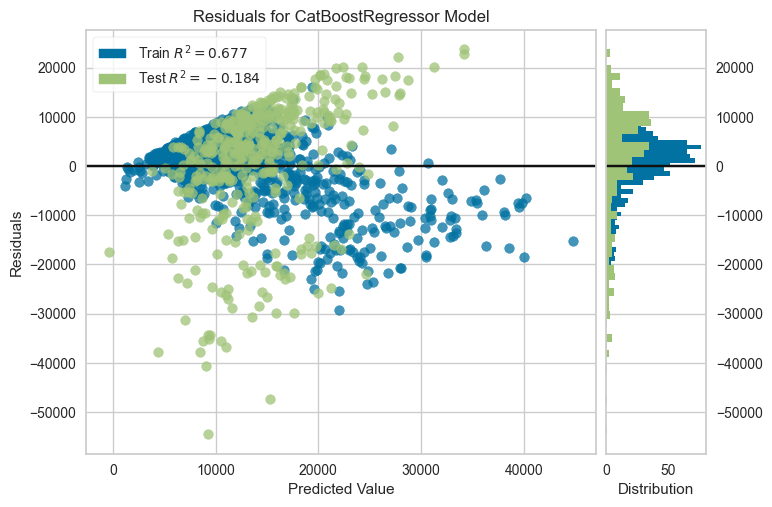

In [ ]:
# plot residuals
plot_model(best, plot = 'residuals')

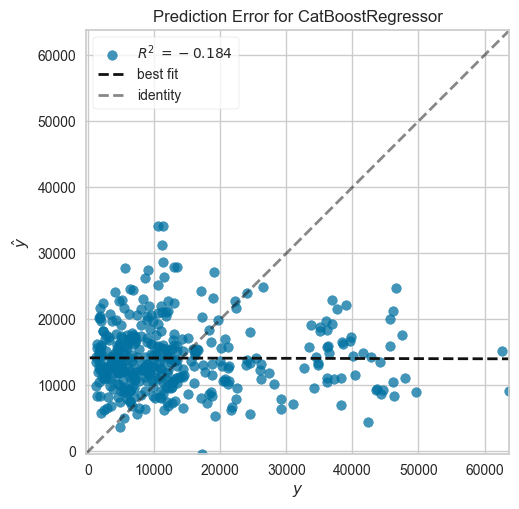

In [ ]:
# plot error
plot_model(best, plot = 'error')

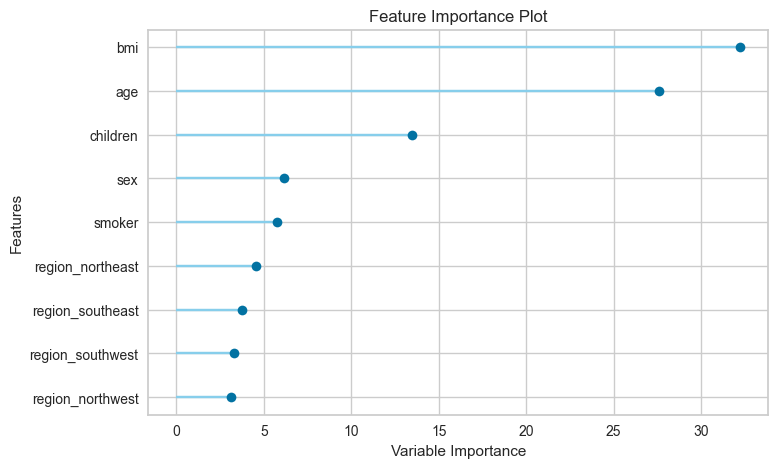

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
# check docstring to see available plots 
# help(plot_model)

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,9955.3140,169148685.3965,13005.7174,-0.1840,1.0440,1.5586


In [ ]:
# show predictions df
holdout_pred.head()

,age,sex,bmi,children,smoker,region,charges,prediction_label
650,49,female,42.680000,2,no,southeast,9800.888672,13504.425282
319,32,male,37.334999,1,no,northeast,4667.607422,16114.309577
314,27,female,31.400000,0,yes,southwest,34838.871094,13424.087493
150,35,male,24.129999,1,no,northwest,5125.215820,22955.805214
336,60,male,25.740000,0,no,southeast,12142.578125,6919.557906


In [ ]:
# copy data and drop charges

new_data = data.copy()
new_data.drop('charges', axis=1, inplace=True)
new_data.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [ ]:
# predict model on new_data
predictions = predict_model(best, data = new_data)
predictions.head()

,age,sex,bmi,children,smoker,region,prediction_label
0,19,female,27.900000,0,yes,southwest,5499.082074
1,18,male,33.770000,1,no,southeast,20929.778672
2,28,male,33.000000,3,no,southeast,10090.377502
3,33,male,22.705000,0,no,northwest,19514.314701
4,32,male,28.879999,0,no,northwest,22811.056640


In [ ]:
# save pipeline
save_model(best, 'my_first_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['age', 'bmi', 'children'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['sex', 'smoker', 'region'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['sex', 'smoker'],
                                     transfor...
                                                                          'data_type': dtype('O'),
                                                                          'mapping': female    0
 male      1
 NaN      -1
 dtype: int64},
                                                                         {'col': 'smoker',
                                                                          'data_type': dtype(

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('my_first_pipeline')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=C:\Users\celes\AppData\Local\Temp\joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerW...
                                                                         'data_type': dtype('O'),
                                                                         'mapping': female    0
male      1
NaN      -1
dtype: int64},
                                                                        {'col': 'smoker',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': no     0
yes    1
NaN   -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['region'],
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model',
                 <catboost.core.CatBoostRegressor object at 0x000001939B57CF90>)])

In [ ]:
s = setup(data, target = 'charges', session_id = 123)

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


In [ ]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'transform_target_param',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [ ]:
# lets access X_train_transformed
get_config('X_train_transformed')

,age,sex,bmi,children,smoker,region_southwest,region_southeast,region_northwest,region_northeast
0,19.0,0.0,27.900000,0.0,1.0,1.0,0.0,0.0,0.0
1,18.0,1.0,33.770000,1.0,0.0,0.0,1.0,0.0,0.0
2,28.0,1.0,33.000000,3.0,0.0,0.0,1.0,0.0,0.0
3,33.0,1.0,22.705000,0.0,0.0,0.0,0.0,1.0,0.0
4,32.0,1.0,28.879999,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1329,52.0,1.0,38.599998,2.0,0.0,1.0,0.0,0.0,0.0
1330,57.0,0.0,25.740000,2.0,0.0,0.0,1.0,0.0,0.0
1331,23.0,0.0,33.400002,0.0,0.0,1.0,0.0,0.0,0.0
1334,18.0,0.0,31.920000,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


In [ ]:
# help(setup)

In [ ]:
# init setup with normalize = True
s = setup(data, target = 'charges', session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,charges
2,Target type,Regression
3,Original data shape,"(1338, 7)"
4,Transformed data shape,"(1338, 10)"
5,Transformed train set shape,"(936, 10)"
6,Transformed test set shape,"(402, 10)"
7,Numeric features,3
8,Categorical features,3
9,Preprocess,True


<Axes: >

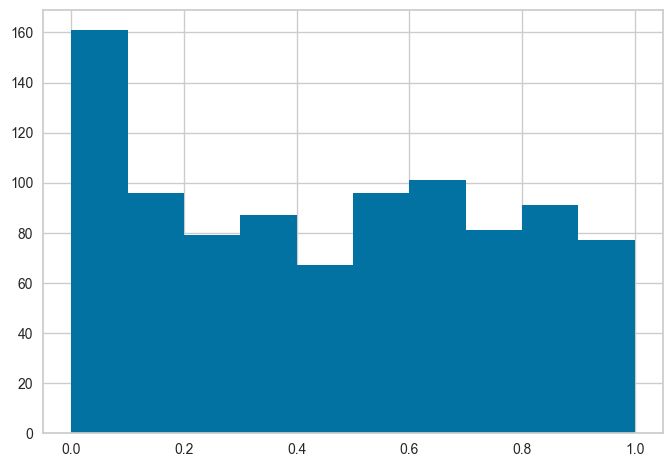

In [ ]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['age'].hist()

In [ ]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,9196.7962,148504418.0597,12131.8559,-0.0174,1.0157,1.5650,0.0220
dummy,Dummy Regressor,9192.5418,148516792.8000,12132.4733,-0.0175,1.0154,1.5637,0.0210
en,Elastic Net,9199.7686,148549726.9505,12133.8720,-0.0177,1.0159,1.5660,0.0200
omp,Orthogonal Matching Pursuit,9221.5250,149344322.9089,12165.8760,-0.0231,1.0180,1.5711,0.0240
ridge,Ridge Regression,9235.7964,149651033.9201,12177.5983,-0.0252,1.0190,1.5739,0.0190
lasso,Lasso Regression,9235.6445,149665146.0420,12178.1566,-0.0253,1.0190,1.5738,0.0230
llar,Lasso Least Angle Regression,9235.6430,149665174.6889,12178.1577,-0.0253,1.0190,1.5738,0.0220
lar,Least Angle Regression,9236.1261,149679639.2332,12178.7361,-0.0254,1.0191,1.5739,0.0190
lr,Linear Regression,9257.7067,150002684.8636,12194.0574,-0.0287,1.0209,1.5807,0.0180
huber,Huber Regressor,8473.8513,160759513.6419,12586.8693,-0.0881,0.9423,1.1148,0.0250


`compare_models` by default uses all the estimators in model library (all except models with `Turbo=False`) . To see all available models you can use the function `models()`

In [ ]:
# check available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
compare_tree_models = compare_models(include = ['dt', 'rf', 'et', 'gbr', 'xgboost', 'lightgbm', 'catboost'])

ValueError: Estimator xgboost Not Available. Please see docstring for list of available estimators.

In [ ]:
compare_tree_models

GradientBoostingRegressor(random_state=123)

In [ ]:
compare_tree_models_results = pull()
compare_tree_models_results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9135,2.354862e+07,4832.9291,0.8320,0.4447,0.3137,0.064
rf,Random Forest Regressor,2772.9195,2.540979e+07,5028.1973,0.8173,0.4687,0.3298,0.075
catboost,CatBoost Regressor,2899.4825,2.576275e+07,5057.5778,0.8163,0.4815,0.3522,0.046
lightgbm,Light Gradient Boosting Machine,3001.8884,2.554732e+07,5044.5767,0.8147,0.5445,0.3784,0.048
et,Extra Trees Regressor,2833.3624,2.842784e+07,5305.6516,0.7991,0.4877,0.3363,0.076
xgboost,Extreme Gradient Boosting,3439.8892,3.282651e+07,5711.7335,0.7626,0.6221,0.4465,0.042
dt,Decision Tree Regressor,3399.1402,4.810020e+07,6915.2984,0.6476,0.5629,0.4052,0.041


In [ ]:
best_mae_models_top3 = compare_models(sort = 'MAE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2701.9135,23548622.1598,4832.9291,0.8320,0.4447,0.3137,0.0640
rf,Random Forest Regressor,2772.9195,25409792.9692,5028.1973,0.8173,0.4687,0.3298,0.0800
et,Extra Trees Regressor,2833.3624,28427844.2412,5305.6516,0.7991,0.4877,0.3363,0.0800
catboost,CatBoost Regressor,2899.4825,25762752.2096,5057.5778,0.8163,0.4815,0.3522,0.0420
lightgbm,Light Gradient Boosting Machine,3001.8884,25547324.5813,5044.5767,0.8147,0.5445,0.3784,0.0500
dt,Decision Tree Regressor,3399.1402,48100203.3847,6915.2984,0.6476,0.5629,0.4052,0.0430
xgboost,Extreme Gradient Boosting,3439.8892,32826514.4000,5711.7335,0.7626,0.6221,0.4465,0.0530
huber,Huber Regressor,3461.7327,49057640.5613,6981.8576,0.6528,0.4815,0.2188,0.0490
par,Passive Aggressive Regressor,3536.1733,48501878.1363,6940.1967,0.6566,0.4785,0.2154,0.0480
knn,K Neighbors Regressor,3778.4582,38143971.2000,6165.0463,0.7277,0.5027,0.3690,0.0470


Processing:   0%|          | 0/87 [00:00<?, ?it/s]

In [ ]:
# list of top 3 models by MAE
best_mae_models_top3

[GradientBoostingRegressor(random_state=123),
 RandomForestRegressor(n_jobs=-1, random_state=123),
 ExtraTreesRegressor(n_jobs=-1, random_state=123)]

In [ ]:
# from pycaret.regression import *
# s = setup(data, target = 'charges', log_experiment='mlflow', experiment_name='insurance_experiment')

In [ ]:
# compare models
# best = compare_models()

In [ ]:
# start mlflow server on localhost:5000
# !mlflow ui

In [ ]:
# check all the available models
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [ ]:
# train linear regression with default fold=10
lr = create_model('lr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4221.7662,33767244.1606,5810.9590,0.7983,0.4864,0.4323
1,4529.8902,43625181.5268,6604.9361,0.7463,0.5543,0.4301
2,3958.4660,32631291.9087,5712.3806,0.5868,1.0240,0.4630
3,3725.8887,26679679.2570,5165.2376,0.7772,0.4979,0.5219
4,4437.1204,43552381.4341,6599.4228,0.6761,0.5731,0.3768
5,4115.6340,35844995.0079,5987.0690,0.7694,0.5381,0.4131
6,4098.0868,39631320.0598,6295.3411,0.7303,0.5745,0.4266
7,4850.1058,46175035.2997,6795.2215,0.7461,0.5706,0.3959
8,4621.0616,40681916.3737,6378.2377,0.7372,0.7032,0.5225


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

The function above has return trained model object as an output. The scoring grid is only displayed and not returned. If you need access to the scoring grid you can use `pull` function to access the dataframe.

In [ ]:
lr_results = pull()
print(type(lr_results))
lr_results

<class 'pandas.core.frame.DataFrame'>


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4221.7662,3.376724e+07,5810.9590,0.7983,0.4864,0.4323
1,4529.8902,4.362518e+07,6604.9361,0.7463,0.5543,0.4301
2,3958.4660,3.263129e+07,5712.3806,0.5868,1.0240,0.4630
3,3725.8887,2.667968e+07,5165.2376,0.7772,0.4979,0.5219
4,4437.1204,4.355238e+07,6599.4228,0.6761,0.5731,0.3768
5,4115.6340,3.584500e+07,5987.0690,0.7694,0.5381,0.4131
6,4098.0868,3.963132e+07,6295.3411,0.7303,0.5745,0.4266
7,4850.1058,4.617504e+07,6795.2215,0.7461,0.5706,0.3959
8,4621.0616,4.068192e+07,6378.2377,0.7372,0.7032,0.5225


In [ ]:
# train linear regression with fold=3
lr = create_model('lr', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4170.7537,35338831.9346,5944.6473,0.7482,0.6562,0.4578
1,4285.8970,39763353.6903,6305.8190,0.7176,0.5406,0.4443
2,4511.4189,40766553.9170,6384.8691,0.7492,0.6160,0.4383
Mean,4322.6899,38622913.1806,6211.7785,0.7383,0.6043,0.4468
Std,141.4885,2358035.1845,191.6273,0.0147,0.0479,0.0082


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# train linear regression with specific model parameters
create_model('lr', fit_intercept = False)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4222.9616,33775764.3432,5811.6920,0.7983,0.4879,0.4328
1,4522.5819,43620030.5192,6604.5462,0.7464,0.5473,0.4216
2,3853.0378,31981107.9602,5655.1842,0.5951,0.7108,0.4398
3,3707.7705,26513348.5760,5149.1114,0.7786,0.4891,0.5164
4,4484.2122,43828444.1000,6620.3054,0.6740,0.5761,0.3847
5,4113.6222,35882341.9810,5990.1871,0.7692,0.5464,0.4130
6,4098.0868,39631320.0598,6295.3411,0.7303,0.5745,0.4266
7,4833.7747,45739275.7172,6763.0818,0.7485,0.5887,0.3967
8,4621.0616,40681916.3737,6378.2377,0.7372,0.7032,0.5225


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(fit_intercept=False, n_jobs=-1)

In [ ]:
# train lr and return train score as well alongwith CV
create_model('lr', return_train_score=True)

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

LinearRegression(n_jobs=-1)

Some other parameters that you might find very useful in `create_model` are:

- cross_validation
- engine
- fit_kwargs
- groups

You can check the docstring of the function for more info.

In [ ]:
# help(create_model)